# Questions

Q1. Can a house price be predicted for a home in a particular zip code with particular features?

Q2. Does density, as defined by the ratio of sqft living to sqft lot, affect house price?

Q3. Which features affect home price?

*inputs  are zip code, income, features etc.
   *use input method
   *assign mean for other inputs
   *make price prediction formula
   *output is price, affordability range, and show 5 comparable houses.

# EDA (from Bobby)

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('kc_house_data.csv')

In [2]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [14]:
# Remove rows from the sqft_basement column with a '?' entry (this removes 454 rows)
df = df[df.sqft_basement != '?']

# Convert the sqft_basement column to an int data type, need to convert to float first
df.sqft_basement = df.sqft_basement.astype(float).astype(int)

# Drop rows in the waterfront column with NAN entries
df.dropna(subset = ['waterfront'], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18804 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             18804 non-null  int64  
 1   date           18804 non-null  object 
 2   price          18804 non-null  float64
 3   bedrooms       18804 non-null  int64  
 4   bathrooms      18804 non-null  float64
 5   sqft_living    18804 non-null  int64  
 6   sqft_lot       18804 non-null  int64  
 7   floors         18804 non-null  float64
 8   waterfront     18804 non-null  float64
 9   view           18749 non-null  float64
 10  condition      18804 non-null  int64  
 11  grade          18804 non-null  int64  
 12  sqft_above     18804 non-null  int64  
 13  sqft_basement  18804 non-null  int64  
 14  yr_built       18804 non-null  int64  
 15  yr_renovated   15474 non-null  float64
 16  zipcode        18804 non-null  int64  
 17  lat            18804 non-null  float64
 18  long  

In [15]:
# Create a dataframe for variables used for the model

# Drop irrelevant columns
df_data = df.drop(columns=['id', 'date', 'view', 'lat', 'long', 'sqft_living15', 'sqft_lot15'])

# Create a size_ratio column
df_data['size_ratio'] = df_data.sqft_living / df_data.sqft_lot

df_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,size_ratio
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400,1951,1991.0,98125,0.354874
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0,1933,NaN,98028,0.077000
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910,1965,0.0,98136,0.392000
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0,1987,0.0,98074,0.207921
5,1230000.0,4,4.50,5420,101930,1.0,0.0,3,11,3890,1530,2001,0.0,98053,0.053174


In [6]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18804 entries, 1 to 21596
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          18804 non-null  float64
 1   bedrooms       18804 non-null  int64  
 2   bathrooms      18804 non-null  float64
 3   sqft_living    18804 non-null  int64  
 4   sqft_lot       18804 non-null  int64  
 5   floors         18804 non-null  float64
 6   waterfront     18804 non-null  float64
 7   condition      18804 non-null  int64  
 8   grade          18804 non-null  int64  
 9   sqft_above     18804 non-null  int64  
 10  sqft_basement  18804 non-null  int64  
 11  yr_built       18804 non-null  int64  
 12  yr_renovated   15474 non-null  float64
 13  zipcode        18804 non-null  int64  
 14  size_ratio     18804 non-null  float64
dtypes: float64(6), int64(9)
memory usage: 2.3 MB


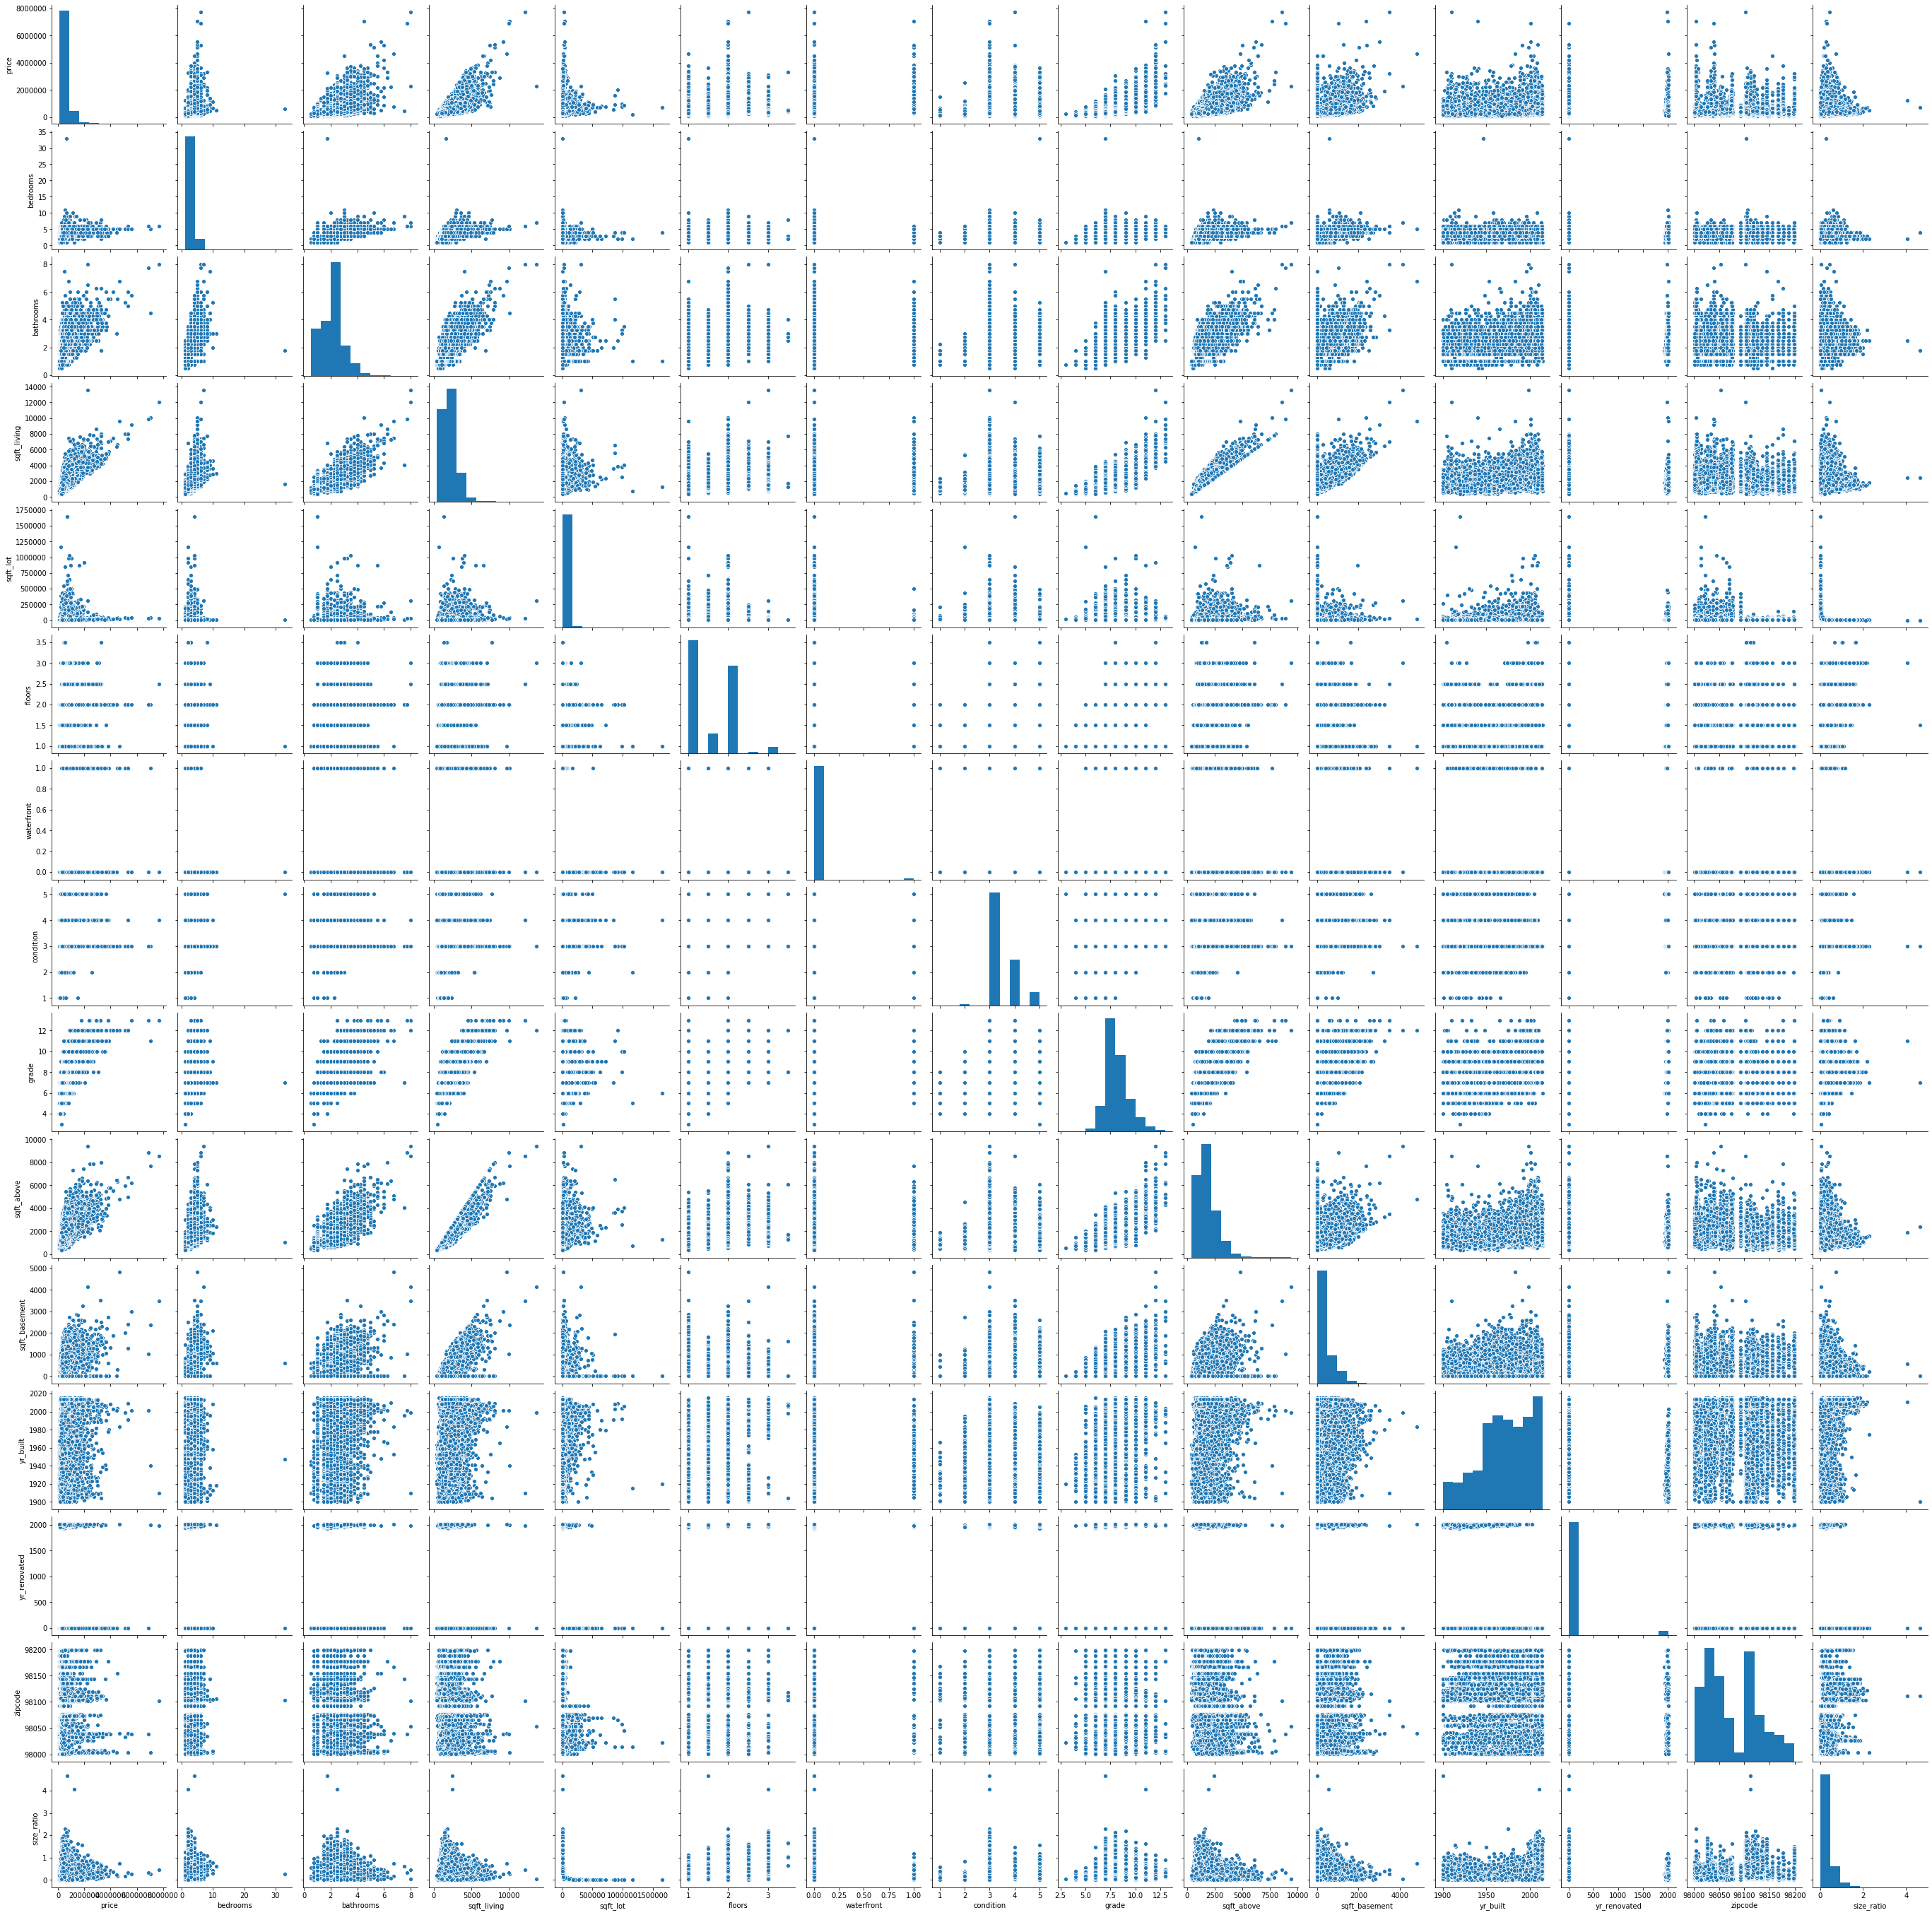

In [7]:
sns.pairplot(df_data)

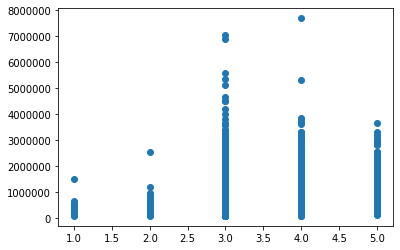

In [8]:
plt.scatter(df_data.condition, df_data.price)

## Create Subset of DataFrame with Continuous Variables

In [7]:
df_cont = df_data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'yr_built']]
df_cont

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built
1,3,2.25,2570,7242,2170,1951
2,2,1.00,770,10000,770,1933
3,4,3.00,1960,5000,1050,1965
4,3,2.00,1680,8080,1680,1987
5,4,4.50,5420,101930,3890,2001
...,...,...,...,...,...,...
21591,3,2.50,1310,1294,1180,2008
21592,3,2.50,1530,1131,1530,2009
21593,4,2.50,2310,5813,2310,2014
21594,2,0.75,1020,1350,1020,2009


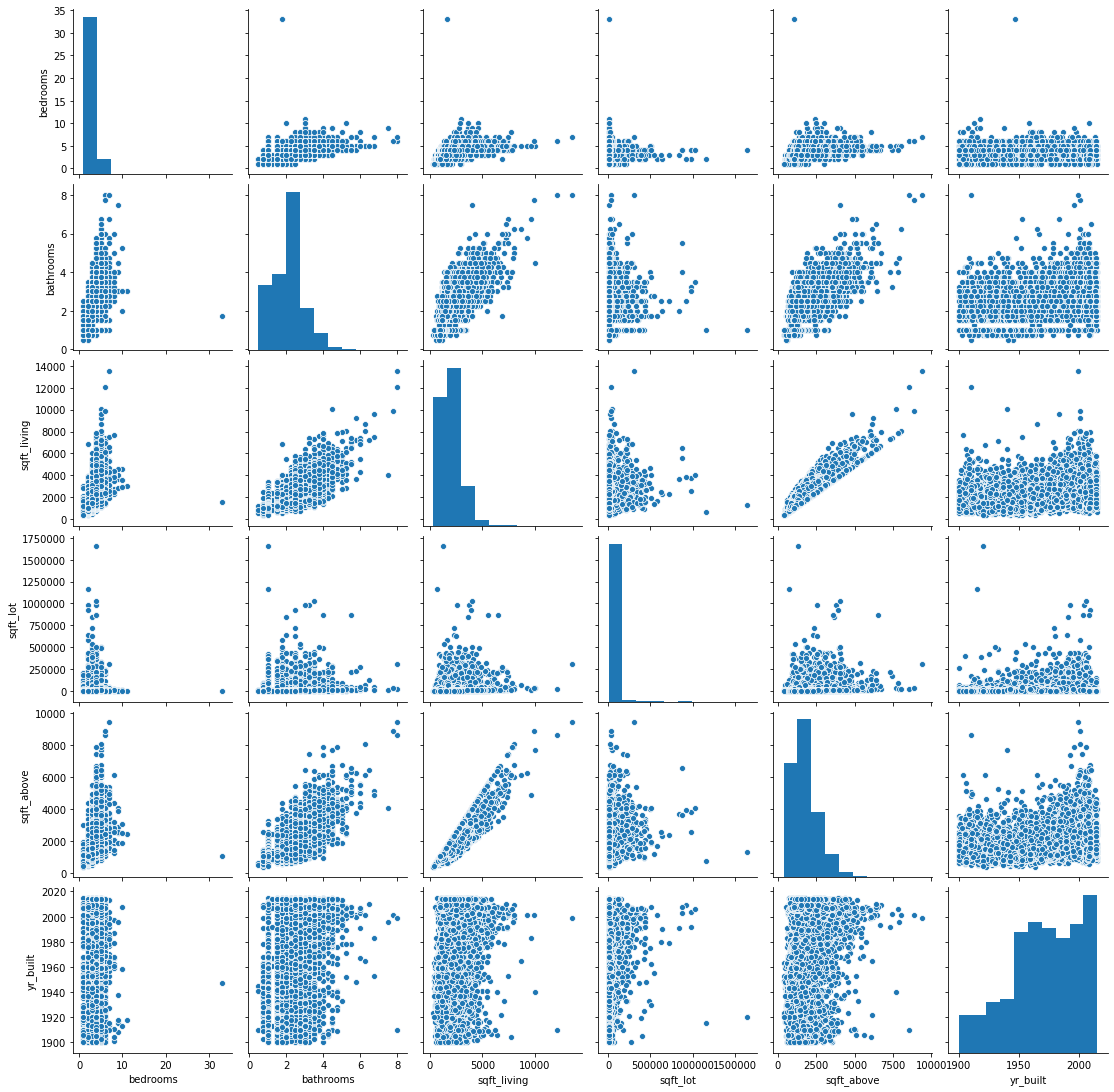

In [10]:
sns.pairplot(df_cont)

## Testing for Linearity

Text(0.5, 1.0, 'Year Built Versus Price')

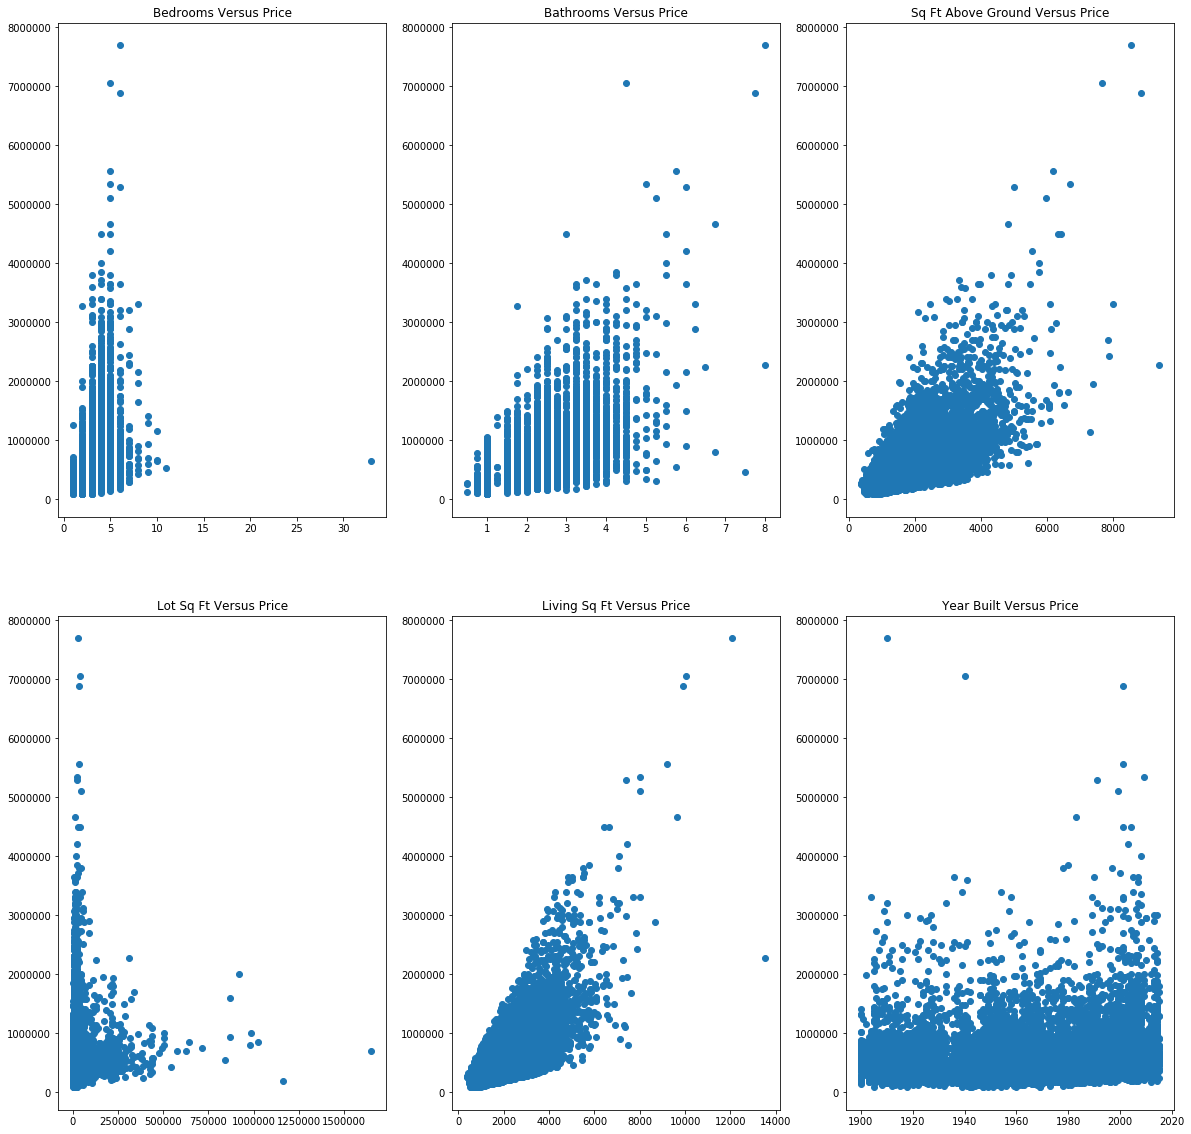

In [11]:
fig, axs = plt.subplots(2,3, figsize=(20,20))

axs[0,0].scatter(df_data['bedrooms'], df_data['price'])
axs[0,0].set_title('Bedrooms Versus Price')

axs[0,1].scatter(df_data['bathrooms'], df_data['price'])
axs[0,1].set_title('Bathrooms Versus Price')

axs[0,2].scatter(df_data['sqft_above'], df_data['price'])
axs[0,2].set_title('Sq Ft Above Ground Versus Price')

axs[1,1].scatter(df_data['sqft_living'], df_data['price'])
axs[1,1].set_title('Living Sq Ft Versus Price')

axs[1,0].scatter(df_data['sqft_lot'], df_data['price'])
axs[1,0].set_title('Lot Sq Ft Versus Price')

axs[1,2].scatter(df_data['yr_built'], df_data['price'])
axs[1,2].set_title('Year Built Versus Price')

##### Decided to take out Year Built and add Grade, because year built is not linear and grade is approximately linear. 

In [12]:
# redefining our continuous variables
df_cont = df_data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'grade']]

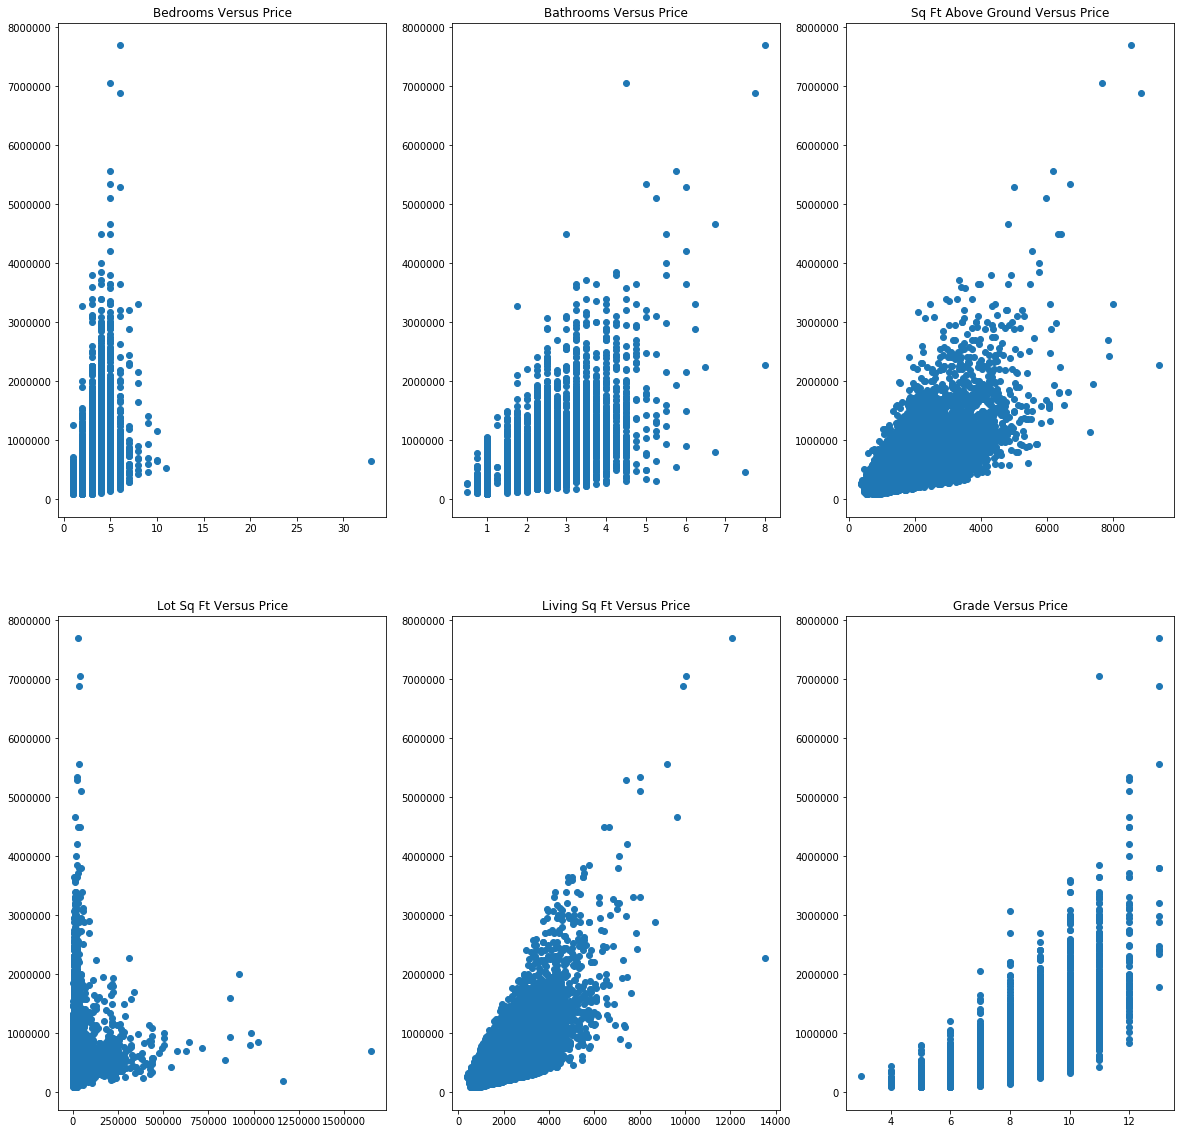

In [13]:
#re-plotting to confirm linearity
#Grade is a discrete variable, but there is a strong relationship which is close to linear, so we decided to include it. 

fig, axs = plt.subplots(2,3, figsize=(20,20))

axs[0,0].scatter(df_data['bedrooms'], df_data['price'])
axs[0,0].set_title('Bedrooms Versus Price')

axs[0,1].scatter(df_data['bathrooms'], df_data['price'])
axs[0,1].set_title('Bathrooms Versus Price')

axs[0,2].scatter(df_data['sqft_above'], df_data['price'])
axs[0,2].set_title('Sq Ft Above Ground Versus Price')

axs[1,1].scatter(df_data['sqft_living'], df_data['price'])
axs[1,1].set_title('Living Sq Ft Versus Price')

axs[1,0].scatter(df_data['sqft_lot'], df_data['price'])
axs[1,0].set_title('Lot Sq Ft Versus Price')

axs[1,2].scatter(df_data['grade'], df_data['price'])
axs[1,2].set_title('Grade Versus Price');


### Use Dummy Variables for Categorical Variables

#### Identifying Categorical Variables

How many categories of bedroom or bathroom do you have?\
How many numeric values do you have?\
How do you interpret it?\
With every one additional bathroom, you might expect the house price to increase by _____.\
Does this approach make sense for other variables?

In [58]:
categorical = df_data[['floors', 'waterfront', 'condition', 'grade', 'yr_renovated', 'zipcode', 'price']]
categorical

,floors,waterfront,condition,grade,yr_renovated,zipcode,price
1,2.0,0.0,3,7,1991.0,98125,538000.0
2,1.0,0.0,3,6,NaN,98028,180000.0
3,1.0,0.0,5,7,0.0,98136,604000.0
4,1.0,0.0,3,8,0.0,98074,510000.0
5,1.0,0.0,3,11,0.0,98053,1230000.0
...,...,...,...,...,...,...,...
21591,2.0,0.0,3,8,0.0,98116,475000.0
21592,3.0,0.0,3,8,0.0,98103,360000.0
21593,2.0,0.0,3,8,0.0,98146,400000.0
21594,2.0,0.0,3,7,0.0,98144,402101.0


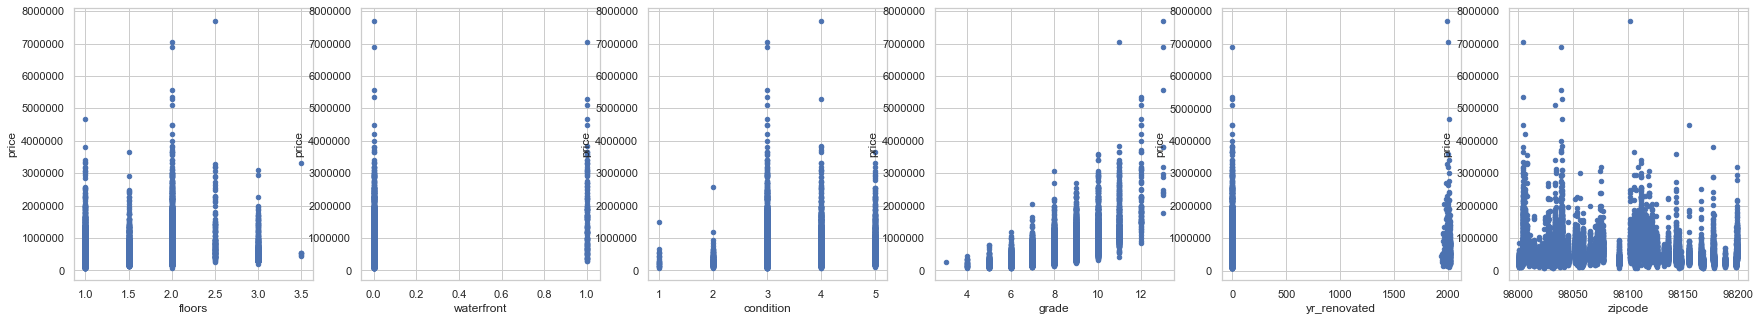

In [65]:
#method from learn
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(30,5))

for xcol, ax in zip(['floors', 'waterfront', 'condition', 'grade', 'yr_renovated', 'zipcode'], axes):
    categorical.plot(kind='scatter', x=xcol, y='price', ax=ax, color='b')

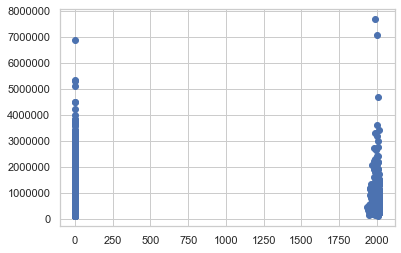

In [72]:
plt.scatter(df_data['yr_renovated'], df_data['price']);

In [71]:
df_data['price']

1         538000.0
2         180000.0
3         604000.0
4         510000.0
5        1230000.0
           ...    
21591     475000.0
21592     360000.0
21593     400000.0
21594     402101.0
21596     325000.0
Name: price, Length: 18804, dtype: float64

In [ ]:
# method of plotting above scatters using for loop and enumerate is similar to this code.
# do not run - this is for reference only. This code does not work.

for i, (key, categorical) in enumerate(gb):
    categorical.plot(ax=axes[0][i])


for i, (key, df2) in enumerate(gb):
    df2.plot(ax=axes[0][i])

In [9]:
#making categories

floors = ['One Fl', 'Two Fl', 'Three or more Fl']
floors_cat = pd.Series(floors).astype('category')

# no cats needed for waterfront. Add column.
# 1 = waterfront
# 0 = inland

# drop one column for each column

# 1 = Poor
# 2 = Fair
# 3 = Good
# 4 = Excellent
# 5 = Luxury
conditions = ['Poor', 'Fair', 'Good', 'Excellent', 'Luxury']
conditions_cat = pd.Series(conditions).astype('category')

# under 6 = mostly flat
# 6-9 = low slope
# 9-12 = hilly
# 12+ = steep
grades = ['Flat', 'Low Slope', 'Hilly', 'Steep']
grades_cat = pd.Series(grades).astype('category')

renovates = ['Not Renovated', 'Prior to 2000', '2000 to Present']
renovates_cat = pd.Series(renovates).astype('category')

zips = ['urban', 'nonurban']
zips_cat = pd.Series(zips).astype('category')

In [104]:
zips_cat

0       urban
1    nonurban
dtype: category
Categories (2, object): [nonurban, urban]

In [16]:
floor_dum = pd.get_dummies(df_data['floors'], prefix='floors', drop_first=True)
waterfront_dum= pd.get_dummies(df_data['waterfront'], prefix='wf', drop_first=True)                                   
condition_dum = pd.get_dummies(df_data['condition'], prefix='cond', drop_first=True)
grades_dum = pd.get_dummies(df_data['grade'], prefix='grade', drop_first=True)


#renovate_dum = pd.get_dummies(df_data['yr_renovated'], prefix='reno', drop_first=True)
#zips_dum = pd.get_dummies(df_data['zipcode'], prefix='zip', drop_first=True)

# Bobby I am waiting to do the dummies for zips and renos. When I did it this way it made 
# a new column for each zip, and a new column for each reno year. This is not what I wanted. 
# It might be okay, but I'm not sure.

In [17]:
df_data = df_data.drop(['waterfront', 'floors', 'condition', 'grade'], axis=1)

In [19]:
df_data = pd.concat([df_data, floor_dum, waterfront_dum, condition_dum, grades_dum], axis=1)
df_data.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
1,538000.0,3,2.25,2570,7242,2170,400,1951,1991.0,98125,...,0,0,0,1,0,0,0,0,0,0
2,180000.0,2,1.00,770,10000,770,0,1933,NaN,98028,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1050,910,1965,0.0,98136,...,0,0,0,1,0,0,0,0,0,0


In [75]:
# Making dataframe for zipcode categories

urban = [98177, 98117, 98107, 98199, 98119, 98109, 98103, 98133, 98125, 98155, 98115,
         98105, 98112, 98102, 98122, 98144, 98108, 98118, 98116, 98121, 98101, 98154, 
         98104, 98134, 98106, 98126, 98136, 98146, 98168, 98178]

In [82]:
def urban_zip(i):
    if i in urban:
        return 1
    else:
        return 0

In [81]:
# THIS CODE IS NOT WORKING

#add a column for urban and non-urban
df_data = df_data.assign(urban= lambda i: urban_zip(i)) 

#for i in df_data['zipcode']:
    

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

#### Checking Distribution of Variables

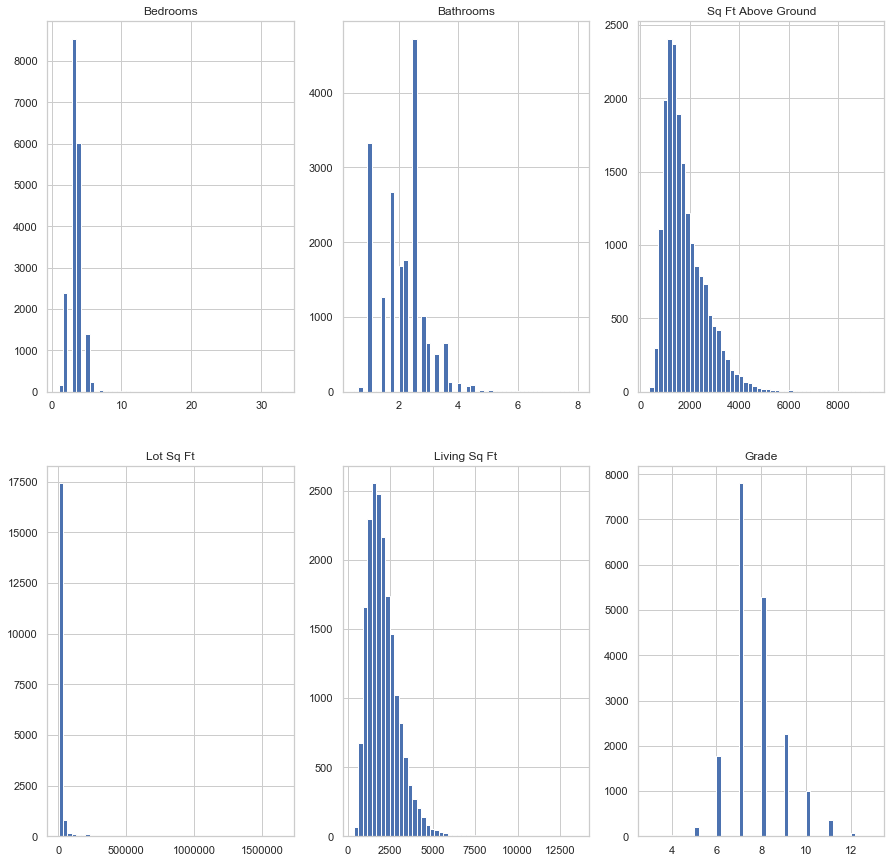

In [47]:
fig, axs = plt.subplots(2,3, figsize=(15,15))

axs[0,0].hist(df_data['bedrooms'], bins=50)
axs[0,0].set_title('Bedrooms')

axs[0,1].hist(df_data['bathrooms'], bins=50)
axs[0,1].set_title('Bathrooms')

axs[0,2].hist(df_data['sqft_above'], bins=50)
axs[0,2].set_title('Sq Ft Above Ground')

axs[1,1].hist(df_data['sqft_living'], bins=50)
axs[1,1].set_title('Living Sq Ft')

axs[1,0].hist(df_data['sqft_lot'], bins=50)
axs[1,0].set_title('Lot Sq Ft')

axs[1,2].hist(df_data['grade'], bins=50)
axs[1,2].set_title('Grade');

Our variables are not normally distributed, except for grade. 

### Checking for Outliers

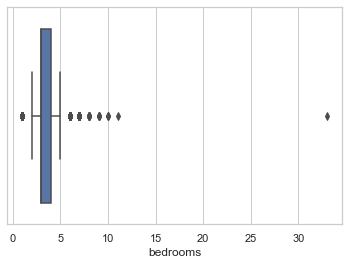

In [21]:
sns.set(style='whitegrid')
sns.boxplot(df_data['bedrooms']);

Bedrooms has an outlier. Decide to eliminate it. 

In [9]:
#locating the row of the bedroom outlier
df_data.loc[df_data['bedrooms']>30]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,size_ratio
15856,640000.0,33,1.75,1620,6000,1.0,0.0,5,7,1040,580,1947,0.0,98103,0.27


In [10]:
#dropping the row of the bedroom outlier
df_data = df_data.drop(df_data.index[15856], inplace=True)

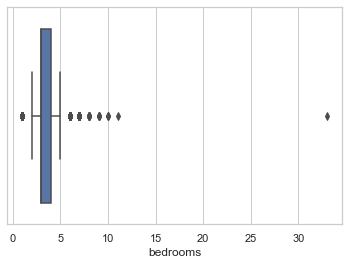

In [22]:
#replotting a box plot
sns.set(style='whitegrid')
sns.boxplot(df_data['bedrooms']);

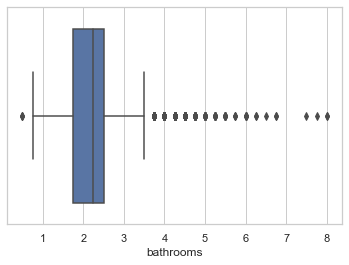

In [23]:
sns.boxplot(df_data['bathrooms']);

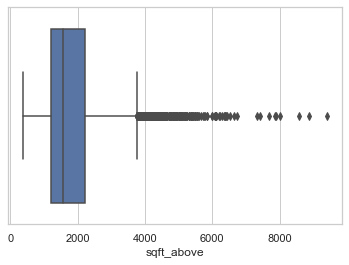

In [24]:
sns.boxplot(df_data['sqft_above']);

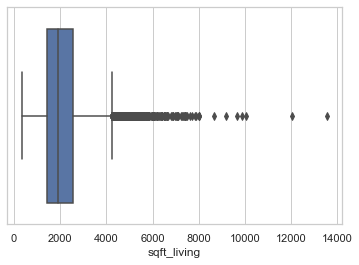

In [25]:
sns.boxplot(df_data['sqft_living']);

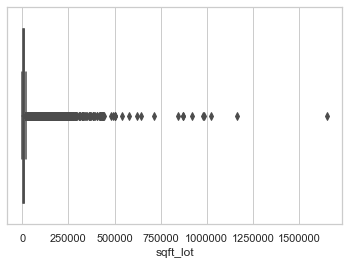

In [26]:
sns.boxplot(df_data['sqft_lot']);

In [27]:
max(df_data['sqft_lot'])

1651359

In [30]:
df_data.loc[df_data['sqft_lot']>1000000]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,size_ratio
1717,700000.0,4,1.0,1300,1651359,1.0,0.0,4,6,1300,0,1920,0.0,98022,0.000787
7762,855000.0,4,3.5,4030,1024068,2.0,0.0,3,10,4030,0,2006,0.0,98045,0.003935
17305,190000.0,2,1.0,710,1164794,1.0,0.0,2,5,710,0,1915,0.0,98014,0.000610


##### Checking latitude and longitude of largest lot

In [36]:
df.loc[df_data['sqft_lot']>1500000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1717,1020069017,3/27/2015,700000.0,4,1.0,1300,1651359,1.0,0.0,3.0,...,6,1300,0,1920,0.0,98022,47.2313,-122.023,2560,425581


Checked on google maps. This is a farm with a farm house. The latitude, longitude, and sf lot (equivalent to 37 acres) are accurate. Decided to keep in. 

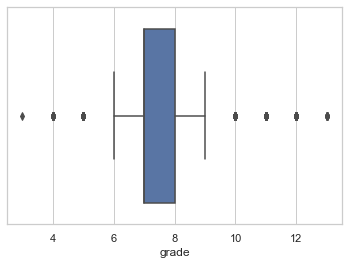

In [28]:
sns.boxplot(df_data['grade']);

### Q-Q Plots

## Determine Colinearity

Text(0.5, 1.0, 'Graphical Colinearity Test')

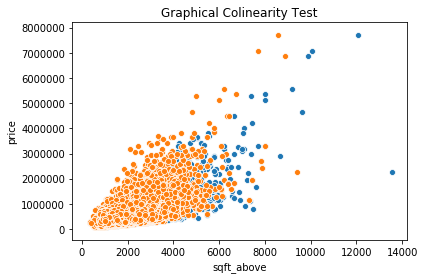

In [92]:
import seaborn as sns
sns.scatterplot(x=df_data['sqft_living'], y=df_data['price'], legend='full').set_title('Living Space Per Sales Price')

import seaborn as sns
sns.scatterplot(x=df_data['sqft_above'], y=df_data['price']).set_title('Graphical Colinearity Test')

#df.plot.scatter(x='sqft_living', y='price')

Text(0.5, 1.0, 'Bathrooms Versus Price')

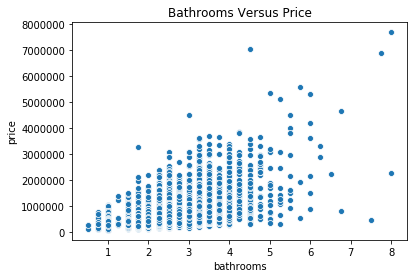

In [93]:
import seaborn as sns
sns.scatterplot(x=df_data['bathrooms'], y=df_data['price']).set_title('Bathrooms Versus Price')

Conclusion: sqft_above and sqft_living are colinear. Remove sqft_above.

In [53]:
#correlation matrix
df_cont.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built
bedrooms,1.000000,0.514508,0.578212,0.032471,0.479386,0.155670
bathrooms,0.514508,1.000000,0.755758,0.088373,0.686668,0.507173
sqft_living,0.578212,0.755758,1.000000,0.173453,0.876448,0.318152
sqft_lot,0.032471,0.088373,0.173453,1.000000,0.184139,0.052946
sqft_above,0.479386,0.686668,0.876448,0.184139,1.000000,0.424037
yr_built,0.155670,0.507173,0.318152,0.052946,0.424037,1.000000


- correlations take a value between -1 and 1, -1 being a perfectly negative linear relationship, and +1 a perfectly positive linear relationship.

In [65]:
df_corr = df_cont.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df_corr['pairs'] = list(zip(df_corr.level_0, df_corr.level_1))

df_corr.set_index(['pairs'], inplace=True)

df_corr.drop(columns=['level_1', 'level_0'], inplace=True)

df_corr.columns = ['cc']

df_corr.drop_duplicates(inplace=True)

df_corr

,cc
pairs,
"(bedrooms, bedrooms)",1.000000
"(sqft_living, sqft_above)",0.876448
"(sqft_living, bathrooms)",0.755758
"(sqft_above, bathrooms)",0.686668
"(sqft_living, bedrooms)",0.578212
"(bedrooms, bathrooms)",0.514508
"(bathrooms, yr_built)",0.507173
"(bedrooms, sqft_above)",0.479386
"(sqft_above, yr_built)",0.424037


In [97]:
#this would be high correlation
df_corr[(df_corr.cc>.75) & (df_corr.cc<1)]

,cc
pairs,
"(sqft_living, sqft_above)",0.876448
"(sqft_living, bathrooms)",0.755758


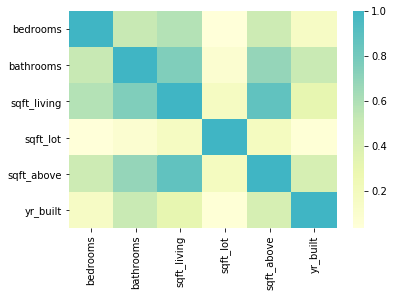

In [83]:
# look at setting color to 4 colors only

sns.heatmap(df_cont.corr(), center=1, cmap='YlGnBu');

The heatmap confirms that sqft_living, sqft_above, and bathrooms are correlated. So we should remove 2 of 3 variables.

## Split Data

In [42]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df_data, test_size=0.2, random_state=12)
print(len(train_set), "train +", len(test_set), "test")

15043 train + 3761 test


In [43]:
train_set.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,size_ratio
17654,465000.0,3,2.00,1430,14250,1.0,0.0,3,7,1430,0,1953,0.0,98033,0.100351
2369,482000.0,3,1.75,2600,105587,1.0,0.0,4,7,1300,1300,1980,0.0,98070,0.024624


In [44]:
test_set.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,size_ratio
3735,211000.0,3,1.00,1410,47916,1.0,0.0,3,7,1410,0,1981,0.0,98019,0.029426
9143,525000.0,4,2.75,2440,5080,2.0,0.0,3,8,1750,690,1960,NaN,98126,0.480315


## Normalize Data

### Log Transformation

In [19]:
df_cont.head(3)

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built
0,3,1.00,1180,5650,1180,0.0,1955
1,3,2.25,2570,7242,2170,400.0,1951
2,2,1.00,770,10000,770,0.0,1933


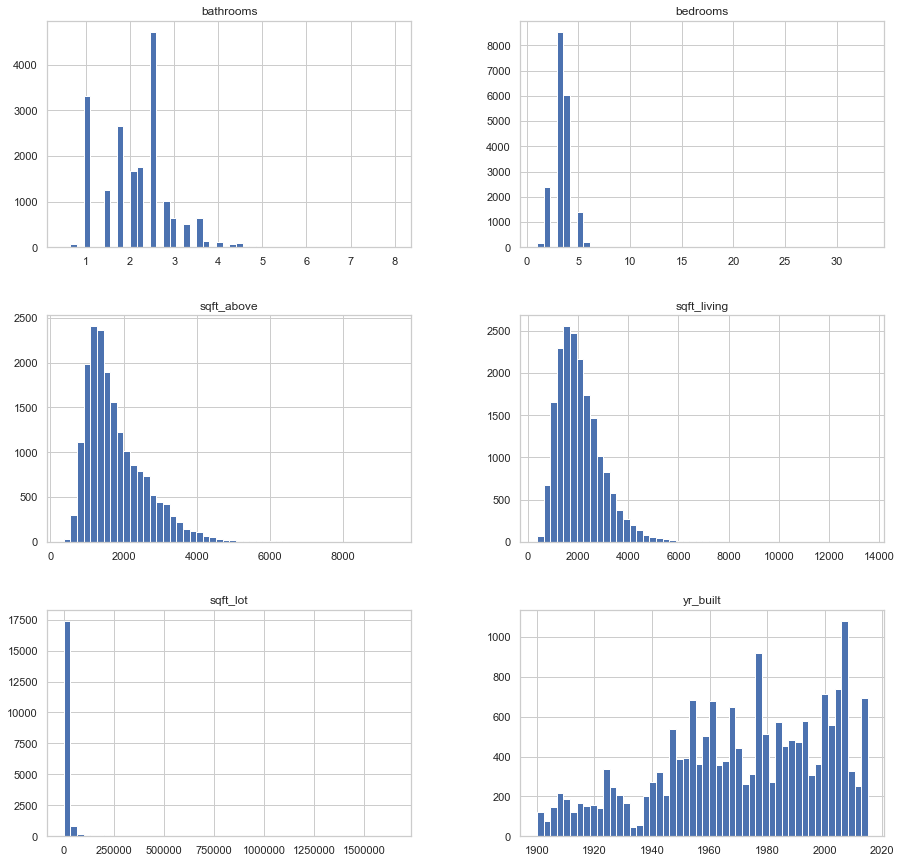

In [40]:
df_cont.hist(figsize = [15,15], bins=50);

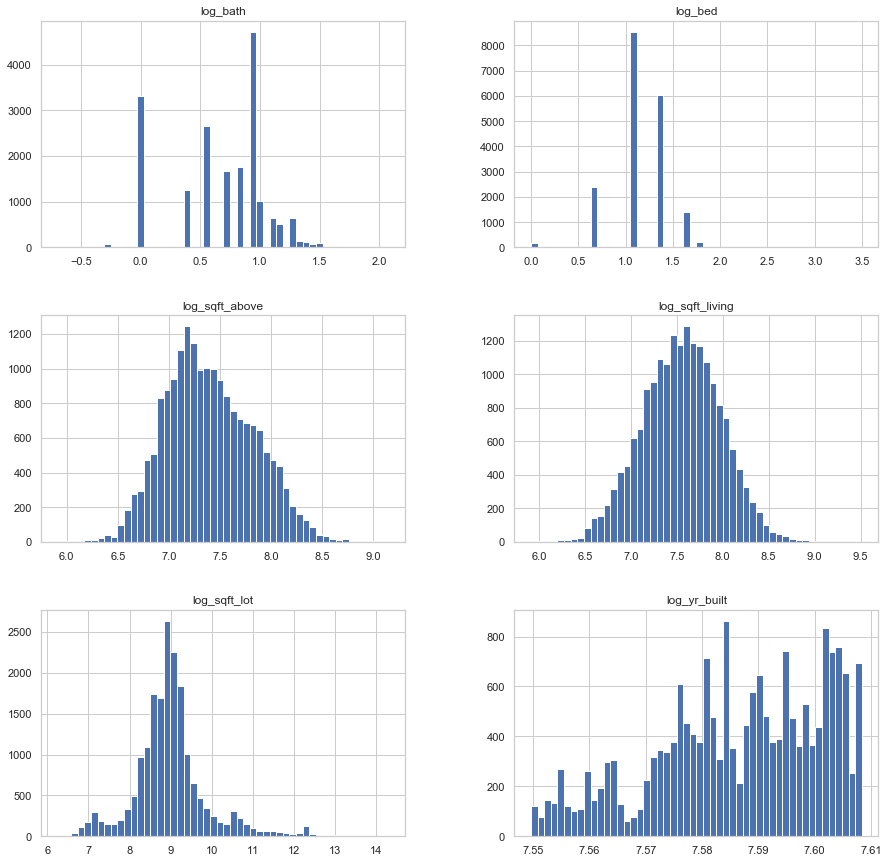

In [41]:
import numpy as np
df_cont_log = pd.DataFrame([])L
df_cont_log['log_bath'] = np.log(df_cont['bathrooms'])
df_cont_log['log_bed'] = np.log(df_cont['bedrooms'])L
df_cont_log['log_sqft_above'] = np.log(df_cont['sqft_above'])
df_cont_log['log_sqft_living'] = np.log(df_cont['sqft_living'])
df_cont_log['log_sqft_lot'] = np.log(df_cont['sqft_lot'])
df_cont_log['log_yr_built'] = np.log(df_cont['yr_built'])
df_cont_log.hist(figsize = [15,15], bins=50);

__Redo scatter plots to see if linearity is improved after log transformation.__

Text(0.5, 1.0, 'Log Year Built')

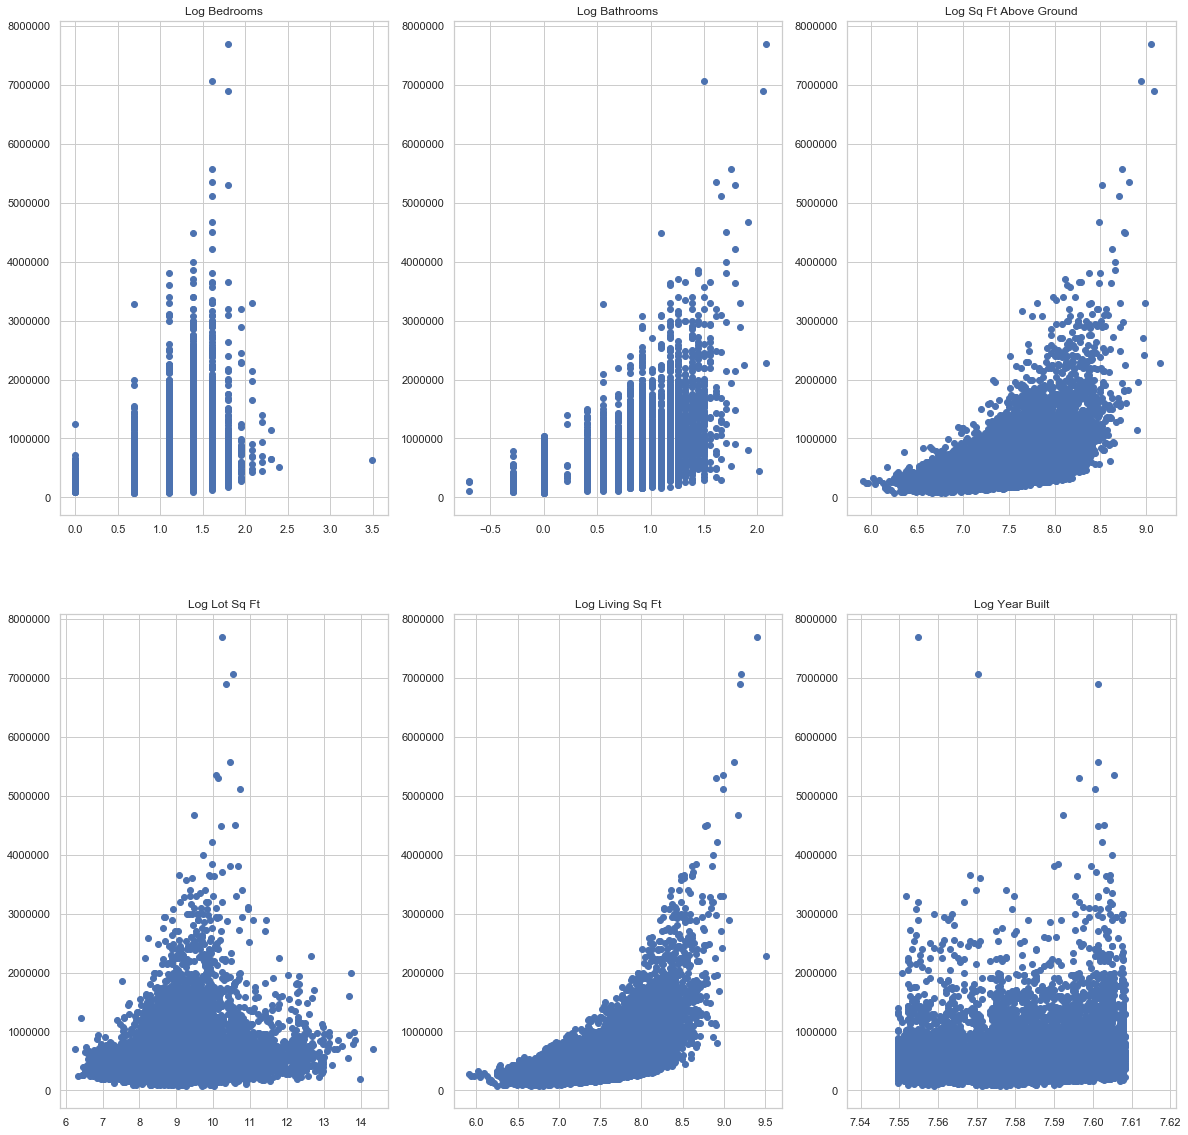

In [48]:
#Grade is a discrete variable, but there is a strong relationship which is close to linear, so we decided to include it. 

fig, axs = plt.subplots(2,3, figsize=(20,20))

axs[0,0].scatter(df_cont_log['log_bed'], df_data['price'])
axs[0,0].set_title('Log Bedrooms')

axs[0,1].scatter(df_cont_log['log_bath'], df_data['price'])
axs[0,1].set_title('Log Bathrooms')

axs[0,2].scatter(df_cont_log['log_sqft_above'], df_data['price'])
axs[0,2].set_title('Log Sq Ft Above Ground')

axs[1,1].scatter(df_cont_log['log_sqft_living'], df_data['price'])
axs[1,1].set_title('Log Living Sq Ft')

axs[1,0].scatter(df_cont_log['log_sqft_lot'], df_data['price'])
axs[1,0].set_title('Log Lot Sq Ft')

axs[1,2].scatter(df_cont_log['log_yr_built'], df_data['price'])
axs[1,2].set_title('Log Year Built')

#axs[1,2].scatter(df_data['grade'], df_data['price'])
#axs[1,2].set_title('Grade Versus Price');

Linearity is not improved, decided not to use log transformation.

### Min-Max Scaling, Standardization & Mean Normalization

In [29]:
# assigning a variable to the log transformation of each element

logbath = df_cont_log['log_bath']
logbed = df_cont_log['log_bed'] 
logsf = df_cont_log['log_sqft_above']
logsfliv = df_cont_log['log_sqft_living']
logsflot = df_cont_log['log_sqft_lot']



In [98]:
# creating functions for the transformations
# these are typically applied to every variable.

def min_max_scaling(element):
    """Transforms an element to bring all values between 0 and 1."""
    scaled_element = (element - min(element)) / (max(element) - min(element))
    return scaled_element

#most commonly used to get multiple variables on different scales to be on the same scale.
#scikit learn standard scaler
def standardization(element, sigma):
    """Changes the mean and standard error"""
    std_element = (element - np.mean(element)) / sigma
    return std_element

def mean_normalization(element):
    """  """
    norm_element = (element - np.mean(element)) / (max(element)- min(element))
    return norm_element



In [99]:
variables = [logbath, logbed, logsf, logsfliv, logsflot]
for i in variables:
    print(min_max_scaling(i))

0        0.250000
1        0.542481
2        0.250000
3        0.646241
4        0.500000
           ...   
21592    0.580482
21593    0.580482
21594    0.146241
21595    0.580482
21596    0.146241
Name: log_bath, Length: 21597, dtype: float64
0        0.314203
1        0.314203
2        0.198240
3        0.396480
4        0.314203
           ...   
21592    0.314203
21593    0.396480
21594    0.198240
21595    0.314203
21596    0.198240
Name: log_bed, Length: 21597, dtype: float64
0        0.358392
1        0.546652
2        0.226478
3        0.322322
4        0.467563
           ...   
21592    0.438662
21593    0.565972
21594    0.313364
21595    0.452486
21596    0.313364
Name: log_sqft_above, Length: 21597, dtype: float64
0        0.322166
1        0.538392
2        0.203585
3        0.463123
4        0.420302
           ...   
21592    0.394322
21593    0.508764
21594    0.281690
21595    0.406749
21596    0.281690
Name: log_sqft_living, Length: 21597, dtype: float64
0        0.2

In [100]:
df_scaled = pd.DataFrame([])

df_scaled['scaled_bath'] = min_max_scaling(logbath)
df_scaled['scaled_bed'] = min_max_scaling(logbed)
df_scaled['scaled_sf'] = min_max_scaling(logsf)
df_scaled['scaled_sfliv'] = min_max_scaling(logsfliv)
df_scaled['scaled_sflot'] = min_max_scaling(logsflot)

df_scaled.head(3)

,scaled_bath,scaled_bed,scaled_sf,scaled_sfliv,scaled_sflot
0,0.250000,0.314203,0.358392,0.322166,0.295858
1,0.542481,0.314203,0.546652,0.538392,0.326644
2,0.250000,0.198240,0.226478,0.203585,0.366664


In [ ]:
from sklearn.preprocessing import StandardScaler

## Create Model

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
formula = 'price~'

In [69]:
## Look at Polynomials

## Analyze Model

In [67]:
# The scale of the y axis determines the scale of the data.

## Check Pattern of Residuals

## Project Requirements

- Business Understanding
   - Have you clearly defined your goal for your analysis?
     
   *inputs  are zip code, income, features etc.
   *use input method
   *assign mean for other inputs
   *return a price prediction
   *output is price, affordability range, and show 5 comparable houses.

   - Have your thought about who your audience is and how they would use this information?
        People who are looking to buy a house.
   
   - How does this help the goals of the business/organization?
        This would give them insight to inform their policy and tax decisions as well as to create programs to help people afford homes. 

- Data Understanding
   - What data are you using?
        Using King County House Dataset provided as well as an equation for housing affordability from an industry standard.
   
   - How does your data help you answer the business question?
        Q1 which 3 features make more affordable homes
        * how do we determine top 3?
   
   - How many observations does your dataset contain?
        21597
        
   - What is the distribution of your data?
        not normal, so we will normalize.
        
   - What data types do you have?   
        int, float, year 

- Data Preparation

   - Have you looked/dealt with missing values?
        waterfront, view, year renovated.
        
   - Have you done any data-type conversion?
        not yet
        sqft_basement came in as an object, convert to int.
        
      - ex: numerical data incorrectly ‘typed’ as strings.
        
        Columns on x-axis:
        'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', density(added)
      
          determine linearity after plotting scatter plots of these
          determine co-linearity and remove these.
        
    - Does your data contain any outliers or non-sensical values?
        yes there are outliers
        revisit looking at scatter plots.